#  "Human Resource Analytics" Kaggle

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**
***
<img src="http://www.goldbeck.com/hrblog/wp-content/uploads/2015/11/giphy-3.gif"/>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

## Importing the data

In [121]:
df = pd.read_csv("HR_comma_sep.csv")

In [122]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Reference from Kaggle Kernel
#### Credit to Randy Lao


## Scrubbing the data

In [123]:
# To check if there is any null value
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [124]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [125]:
df.head(2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [126]:
# Move the "turnover column on the front

front = df['turnover']
df.drop(['turnover'], axis=1, inplace = True)
df.insert (0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## Data Exploration

### Statistical Overview

In [42]:
df.shape

(14999, 10)

In [43]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [44]:
(df.turnover.value_counts())

0    11428
1     3571
Name: turnover, dtype: int64

In [45]:
turnover_rate= (df.turnover.value_counts())/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [46]:
# Statistical overview of the employess
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [47]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Conclusion from the above stats
***
The dataset has:
 - About 15,000 employee observations and 10 features 
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61
 - Median number of years at Company is 3yrs

### Correlation Matrix and Heatmap

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


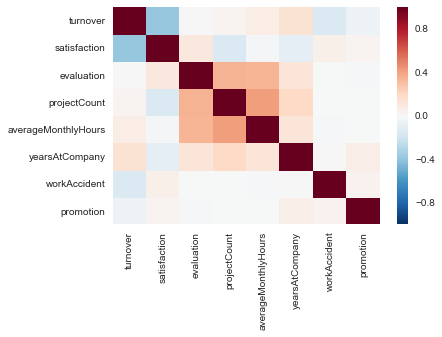

In [48]:
# Correlation

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
corr

Conclusion:
***
**Moderate Positively Correlated Features:** 
- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours:  0.417211
- averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375


**Summary:**

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied. 

### Statistical Test for correlation



#### One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

**Hypothesis Testing:** Is there significant difference in the **means of satisfaction level** between employees who had a turnover and temployees who had no turnover?

 - **Null Hypothesis:** *(H0: pTS = pES)* The null hypothesis would be that there is **no** difference in satisfaction level between employees who did turnover and those who did not..

 - **Alternate Hypothesis:** *(HA: pTS != pES)* The alternative hypothesis would be that there **is** a difference in satisfaction level between employees who did turnover and those who did not..

In [49]:
emp_population_noTurnover = df[df['turnover']==0]['satisfaction'].mean()
emp_population_Turnover = df[df['turnover']==1]['satisfaction'].mean()


print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population_noTurnover))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_population_Turnover) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


##### Conducting the T-Test
***
Let's conduct a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the **stats.ttest_1samp()** function, 

stats.ttest_1samp() is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [53]:
import scipy.stats as stats

stats.ttest_1samp(a = df[df['turnover']==1]['satisfaction'], 
                  popmean = emp_population_noTurnover)

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

##### T-Test Result
***
The test result shows the **test statistic "t" is equal to -51.33**. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies **outside** the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with **stats.t.ppf()**:

In [54]:
degree_freedom

3571

In [55]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025, degree_freedom)  # left quartile
RQ = stats.t.ppf(0.975, degree_freedom)  # right quartile


print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


Conclusion

***
#### **T-Test = -51.33**       |        **P-Value = 0.000_**       |       **Reject Null Hypothesis**

## Is the P-Value literally 0.0? 

**Reject the null hypothesis because:**
 - T-Test score is outside the quantiles
 - P-value is lower than confidence level of 5%

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of **0.00_** at a 5% confidence level is a good indicator to **reject the null hypothesis**. 

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56714b05c647ad9f555348fa/1450265419456/PresentWIP.gif?format=500w"/>

### Distribution Plots (Satisfaction, Evaluation, AverageMonthlyHours)

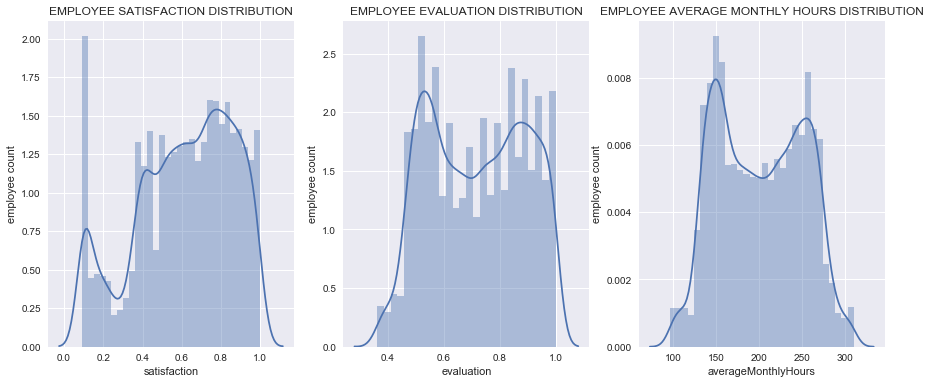

In [63]:
f, axes = plt.subplots(ncols=3, figsize = (15,6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=True, ax= axes[0]).set_title('EMPLOYEE SATISFACTION DISTRIBUTION')
axes[0].set_ylabel("employee count")

# Graph Employee evaluation
sns.distplot(df.evaluation, kde=True, ax= axes[1]).set_title('EMPLOYEE EVALUATION DISTRIBUTION')
axes[1].set_ylabel("employee count")

# Graph Employee Average Monthly hours
sns.distplot(df.averageMonthlyHours, kde=True, ax= axes[2]).set_title('EMPLOYEE AVERAGE MONTHLY HOURS DISTRIBUTION')
axes[2].set_ylabel("employee count")



Conclusion

***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 
 - The evaluation and average monthly hour graphs both share a similar distribution. 
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.
 

### Salary vs Turnover

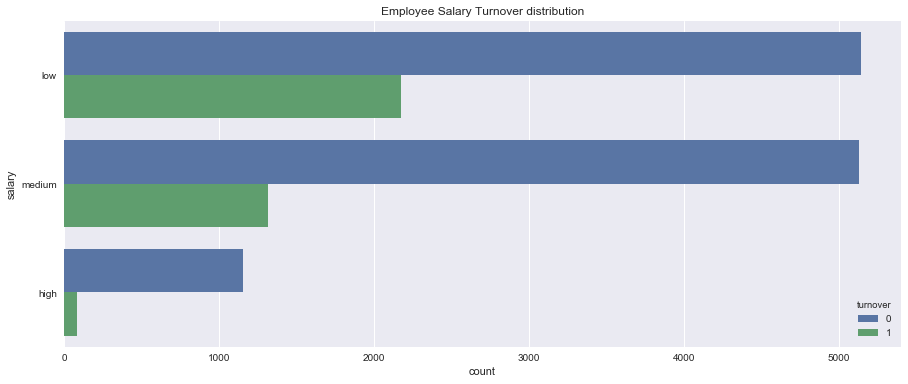

In [57]:
f, axes = plt.subplots(figsize=(15,6))

sns.countplot(y='salary', hue = 'turnover', data=df).set_title('Employee Salary Turnover distribution')

Conclusion

***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.
 
**Think:** 
 
 - What made employees with high salaries to leave?

### Department vs Turnover

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

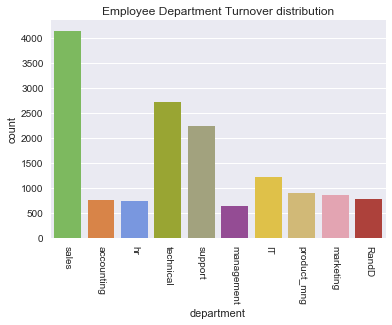

In [58]:
#Employee Distribution across the department

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department',  data=df, palette = color_types).set_title('Employee Department Turnover distribution')

plt.xticks(rotation =-90)

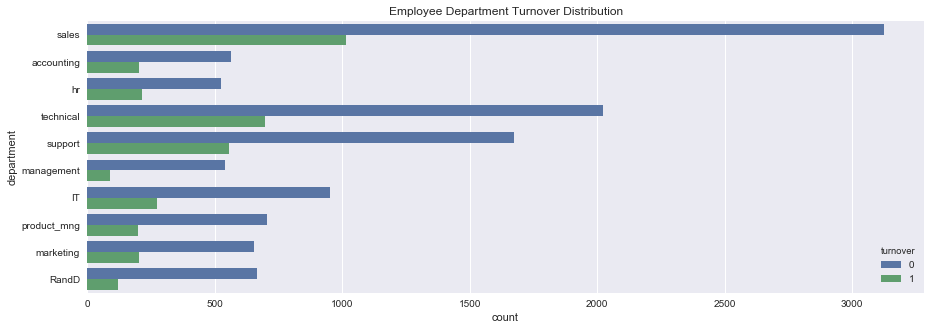

In [59]:
f, ax = plt.subplots(figsize=(15, 5))

# hue = turnover gives the count between two classes
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')

Conclusion

 - The **sales, technical, and support department** were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover
 


### Turnover vs Project Count

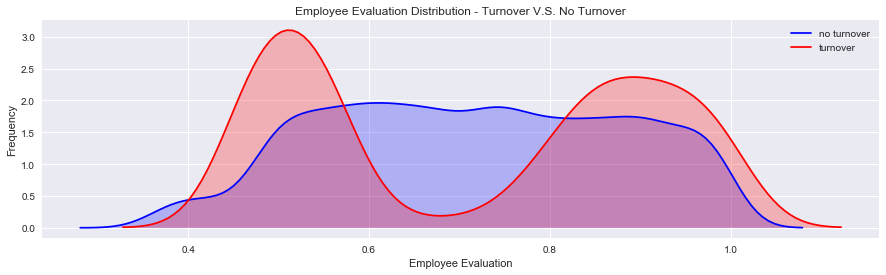

In [60]:
# Kernel density plot

####(df[df['turnover']==0]['evaluation']) and df.loc[(df['turnover']==0), 'evaluation']) are same

fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Conclusion
 - There is a biomodal distribution for those that had a turnover. 
 - Employees with **low** performance tend to leave the company more
 - Employees with **high** performance tend to leave the company more
 - The **sweet spot** for employees that stayed is within **0.6-0.8** evaluation

### Turnover vs AverageMonthlyHours

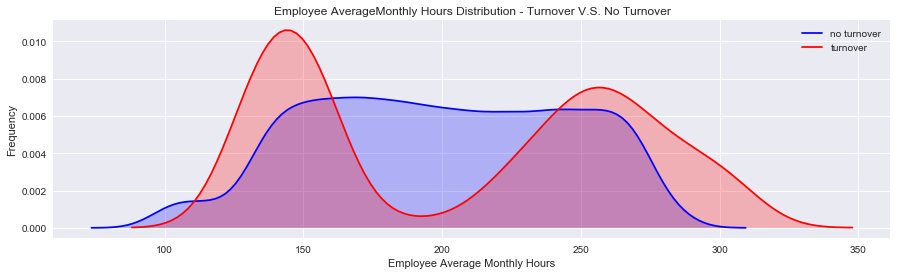

In [61]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Conclusion

 - Another bi-modal distribution for employees that turnovered 
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company 
 - Employees who left generally were **underworked** or **overworked**.

### Turnover vs Satisfaction

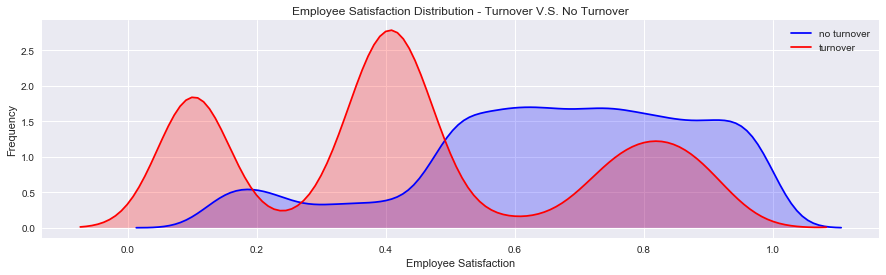

In [65]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Satisfaction', ylabel='Frequency')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

Conclusion

 - There is a **tri-modal** distribution for employees that turnovered
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more
 - Employees who had low satisfaction levels **(0.3~0.5)** left the company more
 - Employees who had really high satisfaction levels **(0.7 or more)** left the company more

### ProjectCount vs AverageMonthlyHours

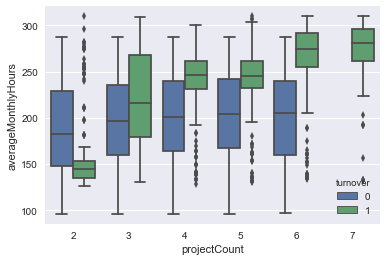

In [66]:
sns.boxplot(x='projectCount', y='averageMonthlyHours', hue = 'turnover', data=df)

Conclusion

 - As project count increased, so did average monthly hours
 - Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. 
 - Looks like employees who **did not** have a turnover had **consistent** averageMonthlyHours, despite the increase in projects
 - In contrast, employees who **did** have a turnover had an increase in averageMonthlyHours with the increase in projects

 **Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

### ProjectCount vs Evaluation

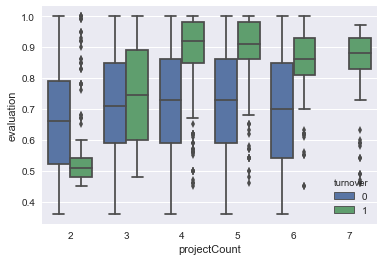

In [72]:
sns.boxplot(x='projectCount', y='evaluation', hue ='turnover', data=df)

Conclusion

This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 

The plot below shows the behavior of the employee who left
  - People worked more and evaluated high
  - People worked less and evaluated less
  
Employee who stayed with the company are consistent in their working hour behavior as well as in their evaluation

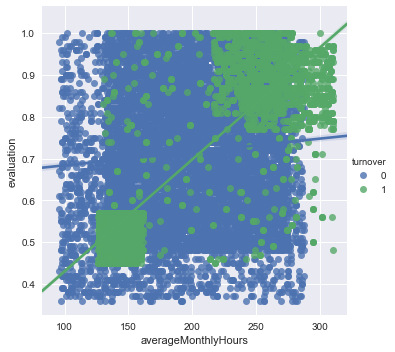

In [77]:
sns.lmplot(x ='averageMonthlyHours', y='evaluation', data =df, 
           fit_reg = True,
          hue ='turnover')

### Satisfaction vs Evaluation

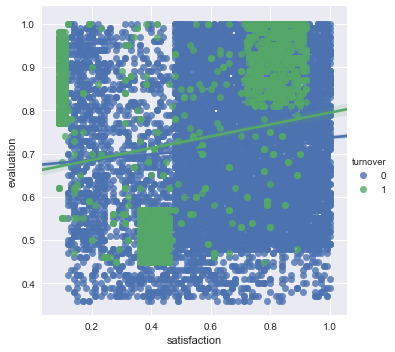

In [75]:
sns.lmplot(x ='satisfaction', y='evaluation', data =df, 
           fit_reg = True,
          hue ='turnover')

Conclusion

 - There are **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

### Turnover vs YearsAtCompany

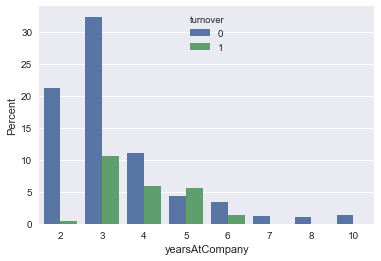

In [82]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Conclusion

- Employee are generally leaving the company in the range of **(3-5)years**
- Speacial care should be given to employee at **5yrs** completion

## K-Means Clustering of Employee Turnover

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

**Clustering PROBLEM:**
    - How do we know that there are "3" clusters?
    - We would need expert domain knowledge to classify the right amount of clusters
    - Hidden uknown structures could be present

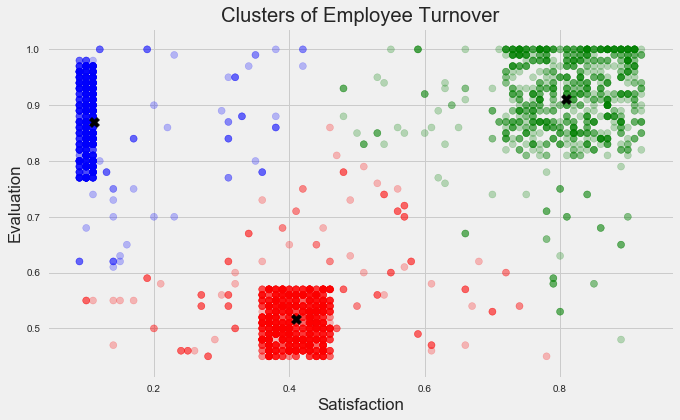

In [115]:
# Import Kmeans Model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =3, random_state=2)
kmeans.fit(df[df['turnover']==1][['satisfaction','evaluation']])

kmeans_colors= ['green' if c ==0 else 'blue' if c==2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10,6))

plt.scatter(x='satisfaction', y='evaluation', data=df[df['turnover']==1],
           alpha =0.25, color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='black', marker="X", s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

## Classification and Feature Importance

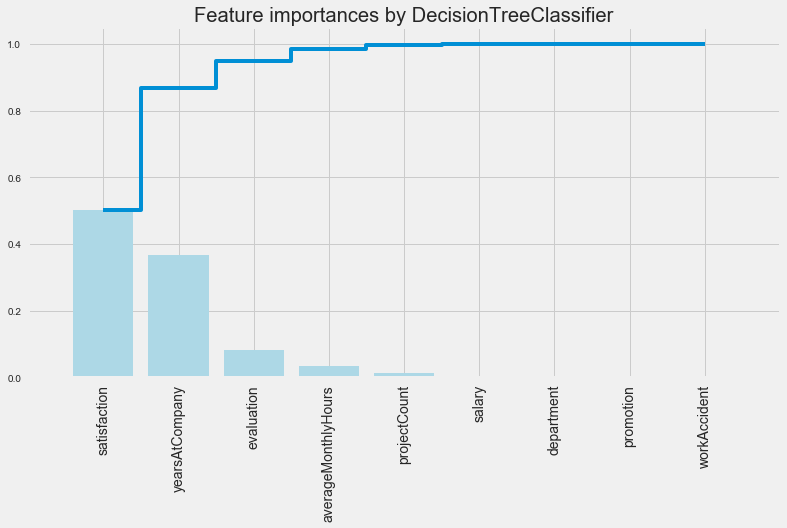

In [127]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =(12,6)

df['department']= df['department'].astype('category').cat.codes
df['salary']= df['salary'].astype('category').cat.codes

# Create train test splits
y = df['turnover']
X = df.drop('turnover', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.15, random_state=42, stratify=y)

dtree = tree.DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01)

dtree.fit(X_train, y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'], axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Conclusion of Decision Tree Model

**Top 3 Features **
1. Satisfaction
2. YearsAtCompany
3. Evaluation

### Modelling the Data: Logistic Regression Analysis

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [130]:
# Create an intercept term for the logistic regression equation
df_lr = df
df_lr['int']=1

# Create train test splits
y= df_lr['turnover']
X = df_lr.drop('turnover', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.15, random_state=42, stratify =y)

# Using the three most important features to create the model : Satisfaction, Evaluation, YearsAtCompany

import statsmodels.api as sm
iv = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int']
logReg= sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary()
answer.params

Optimization terminated successfully.
         Current function value: 0.468642
         Iterations 6


satisfaction     -3.726979
evaluation        0.299826
yearsAtCompany    0.168779
int               0.097621
dtype: float64

Conclusion

**Employee Turnover Score** = Satisfaction*(**-3.726979**) + Evaluation*(**0.299826**) + YearsAtCompany*(**0.168779**) + **0.097621**

#### Explanation of Coefficients

In [131]:
# create function to compute coefficient

coef = answer.params

def y(coef, Satisfaction, Evaluation, YearsAtCompany):
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1)/(1+np.exp(y1))
p

0.14615687292416754

Conclusion

Hence using above coefficients, company can make a Retention plan (using Logistic Regression model)

1.	**Safe Zone (Green)** – Employees within this zone are considered safe. 
2.	**Low Risk Zone (Yellow)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3.	**Medium Risk Zone (Orange)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly. 
4.	**High Risk Zone (Red)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. 

So with our example above, the employee with a **14%** turnover score will be in the **safe zone**. 

<img src="http://i64.tinypic.com/somk9s.jpg"/>

## Other ML Models

- Decision Tree
- Adaboost model
- Logistic Regression
- **Random Forest Model** performed best

<img src="http://i68.tinypic.com/qsts7k.jpg"/>

In [134]:
# create a base rate model
## assuming all the sample points are 0

def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [135]:
# train test split

y = df['turnover']
X = df.drop('turnover', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42, stratify=y)


In [136]:
# Check accuracy of base model
y_base_rate = base_rate_model(X_test)

from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [143]:
# Check accuracy of Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic Accuracy is 0.77


In [144]:
# Using 10 fold Cross-validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10, random_state=42)
modelCV= LogisticRegression(class_weight="balanced")
scoring ='roc_auc'

results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print ("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.815 (0.011)


## Logistic Regression vs Random Forest vs Decision Tree vs AdaBoost Model

In [146]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      1714
          1       0.00      0.00      0.00       536

avg / total       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.78
             precision    recall  f1-score   support

          0       0.92      0.76      0.83      1714
          1       0.51      0.79      0.62       536

avg / total       0.82      0.77      0.78      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1714
          1       0.93      0.91      0.92       536

avg / total       0.96      0.96      0.96      2250



/Users/rajegupt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




 ---Random Forest Model---
Random Forest AUC = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1714
          1       1.00      0.95      0.97       536

avg / total       0.99      0.99      0.99      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.93
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1714
          1       0.92      0.89      0.90       536

avg / total       0.95      0.95      0.95      2250



### ROC Graph

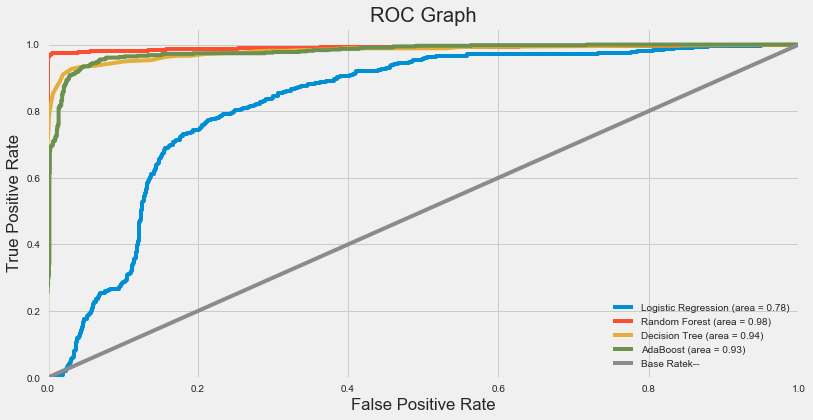

In [158]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()